In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns

police_killings = pd.read_csv('shootings.csv', dtype={'race': 'category'}, encoding='latin-1')

police_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [2]:
police_killings['race'].value_counts()

def get_percet_of_total(race):
    return len(police_killings[police_killings['race'] == race].index) / len(police_killings.index)

print('{:.2%} of people killed by police are White'.format(get_percet_of_total('White')))
print('{:.2%} of people killed by police are Black'.format(get_percet_of_total('Black')))
print('{:.2%} of people killed by police are Hispanic'.format(get_percet_of_total('Hispanic')))
print('{:.2%} of people killed by police are Asian'.format(get_percet_of_total('Asian')))

50.58% of people killed by police are White
26.52% of people killed by police are Black
18.43% of people killed by police are Hispanic
1.90% of people killed by police are Asian


In [8]:
def get_percet_of_column_by_value(race, weapon, column):
    race_grouped = police_killings.groupby('race')
    return (race_grouped.get_group(race)[column] == weapon).sum() / len(race_grouped.get_group(race).index)

print('{:.2%} of white people that were unarmed when killed'.format(get_percet_of_column_by_value('White', 'Unarmed', 'arms_category')))
print('{:.2%} of black people that were unarmed when killed'.format(get_percet_of_column_by_value('Black', 'Unarmed', 'arms_category')))

print('\n{:.2%} of white people that had a gun when killed'.format(get_percet_of_column_by_value('White', 'Guns', 'arms_category')))
print('{:.2%} of black people that had a gun when killed'.format(get_percet_of_column_by_value('Black', 'Guns', 'arms_category')))

print('\n{:.2%} of white people that were reported to have a mental illness'.format(get_percet_of_column_by_value('White', True, 'signs_of_mental_illness')))
print('{:.2%} of black people that were reported to have a mental illness'.format(get_percet_of_column_by_value('Black', True, 'signs_of_mental_illness')))

print('\n{:.2%} of white people that were killed with body camera on'.format(get_percet_of_column_by_value('White', True, 'body_camera')))
print('{:.2%} of black people that were killed with body camera on'.format(get_percet_of_column_by_value('Black', True, 'body_camera')))


race_grouped = police_killings.groupby('race')

print('\n{:.2f} years old is the average age of a white person killed'.format(race_grouped.get_group('White')['age'].mean()))
print('{:.2f} years old is the average age of a black person killed'.format(race_grouped.get_group('Black')['age'].mean()))

5.90% of white people that were unarmed when killed
9.48% of black people that were unarmed when killed

58.76% of white people that had a gun when killed
59.01% of black people that had a gun when killed

28.80% of white people that were reported to have a mental illness
14.18% of black people that were reported to have a mental illness

9.45% of white people that were killed with body camera on
15.72% of black people that were killed with body camera on

39.91 years old is the average age of a white person killed
32.55 years old is the average age of a black person killed


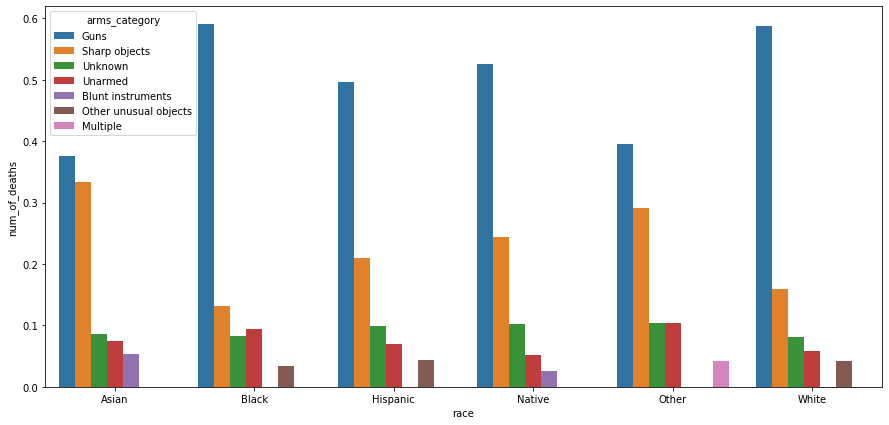

In [10]:
races = police_killings.groupby("race").groups

top_weapons_by_race = police_killings.groupby("race")["arms_category"].value_counts(normalize=True)
top_weapons_reset = top_weapons_by_race.groupby("race").nlargest(5).reset_index(level=0, drop=True).reset_index(level="race")
top_weapons_reset["num_of_deaths"] = top_weapons_reset.index
top_weapons_reset.index = pd.RangeIndex(len(top_weapons_reset.index))
top_weapons = top_weapons_reset.rename(columns={"num_of_deaths": "arms_category", "arms_category": "num_of_deaths"})

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x="race", y="num_of_deaths", hue="arms_category", data=top_weapons)